In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
from parse import compile, parse
import mdtraj as mdt
import matplotlib.pyplot as plt

sys.path.append("../../analysis")
from rdc import compute_rdc
from rg import gmx_gyrate


In [2]:
# xtc = "/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.xtc"
# gro = "/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.gro"

xtc = "/data/gzappavigna/traj/a99sb-ildn_opc/step5_production_nojump.xtc"
gro = "/data/gzappavigna/traj/a99sb-ildn_opc/step5_production_nojump.pdb"


In [3]:
rg_df = gmx_gyrate(xtc, gro)

27


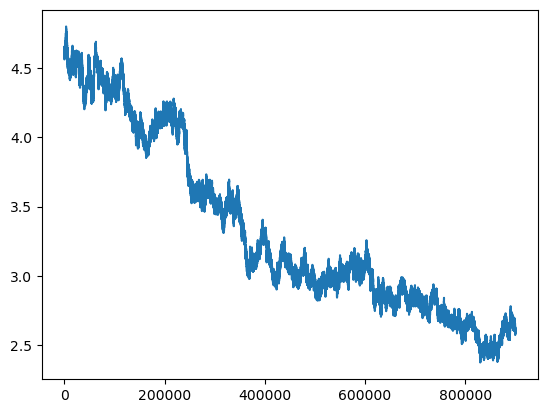

In [4]:
plt.plot(rg_df.Rg)

In [ ]:
traj = mdt.load(xtc, top=gro)


In [20]:
period = 1e2 # 1e3 ps = 1 ns
one_every = round(period / traj.timestep)
# inds = np.arange(0, traj.time.size, one_every)

inds = np.arange(250_000, traj.time.size, one_every)

subtraj = traj[inds]

In [21]:
len(subtraj)

1751

In [8]:
subtraj.xyz.shape

(211, 1998, 3)

In [22]:
# nh_vecs, eigvals, eigvecs_dict = compute_rdc(subtraj)
rdc = compute_rdc(subtraj)

<BarContainer object of 124 artists>

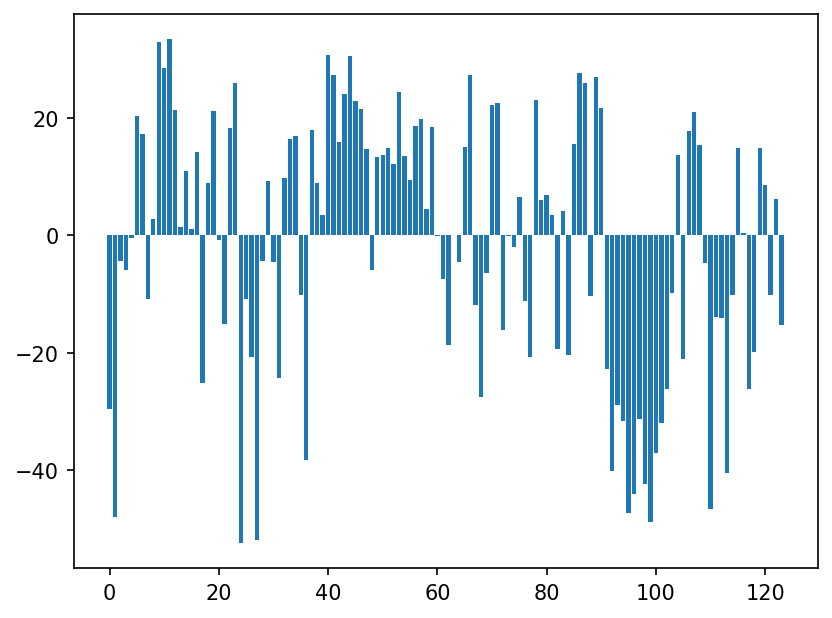

In [23]:
plt.figure(dpi=150)
plt.bar(np.arange(rdc.size), rdc)

In [12]:

eigval_fmt = "DATA EIGENVALUES (Sxx_d,Syy_d,Szz_d)   {:2.4e} {:2.4e} {:2.4e}"
eigvec_fmt = "DATA EIGENVECTORS {:1}_AXIS {:2.4e} {:2.4e} {:2.4e}"
euler_angs_fmt = "DATA EULER_ANGLES {:7.2f} {:7.2f} {:7.2f}"

# print(parse(eigval_fmt, "DATA EIGENVALUES (Sxx_d,Syy_d,Szz_d)    3.2786e-04  5.1444e-04 -8.4230e-04"))

print(parse(eigval_fmt, "DATA EIGENVALUES (Sxx_d,Syy_d,Szz_d)    1.5108e-03  1.9078e-03 -3.4185e-03"))
print(parse(eigvec_fmt, "DATA EIGENVECTORS X_AXIS -1.4703e-01  9.2360e-01 -3.5404e-01"))

print(parse(euler_angs_fmt, "DATA EULER_ANGLES -205.00 -25.30  260.64"))

<Result (0.0015108, 0.0019078, -0.0034185) {}>
<Result ('X', -0.14703, 0.9236, -0.35404) {}>
<Result (-205.0, -25.3, 260.64) {}>


In [24]:
def _get_lines_to_skip(filename):
    # format_string = """FORMAT %4d %4s %4s %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f"""
    format_string = r"FORMAT  %4d %4s %4s %4d %4s %4s %9.2f %9.3f %9.3f %9.3f %.2f %.2f"
    handle = open(filename)
    for i, line in enumerate(handle):
        if line.find(format_string) != -1:
            return i + 2

    raise Exception


names = [
    "RESID_I",
    "RESNAME_I",
    "ATOMNAME_I",
    "RESID_J",
    "RESNAME_J",
    "ATOMNAME_J",
    "DI",
    "D_OBS",
    "D",
    "D_DIFF",
    "DD",
    "W",
]

lines_to_skip = _get_lines_to_skip("example.pal")

df = pd.read_table(
    "example.pal",
    names=names,
    header=None,
    sep=r"\s+",
    skiprows=lines_to_skip,
)


In [25]:
df.columns

Index(['RESID_I', 'RESNAME_I', 'ATOMNAME_I', 'RESID_J', 'RESNAME_J',
       'ATOMNAME_J', 'DI', 'D_OBS', 'D', 'D_DIFF', 'DD', 'W'],
      dtype='object')

In [29]:
df = df.drop(columns=["RESNAME_I", "RESNAME_J"]).set_index(
    [
        "RESID_I",
        "ATOMNAME_I",
        "RESID_J",
        "ATOMNAME_J",
    ],
)


In [ ]:
D = df.loc[(slice(None),"N", slice(None), "HN"), :].D
plt.bar(np.arange(D.size), D)

In [24]:
traj = mdt.load("1IGD_H_s.pdb")

In [29]:
traj = mdt.load_pdb("1IGD_H_s.pdb") # standard_names=False)

In [19]:
traj

<mdtraj.Trajectory with 1 frames, 568 atoms, 55 residues, without unitcells at 0x7f351d3bf230>

In [32]:
rdc, rot_basis = compute_rdc(traj)

(55, 1, 3)


In [ ]:
# np.isclose(rot_basis, np.eye(3), rtol=0, atol=1e-05)
np.isclose(rot_basis, np.eye(3), atol=1e-5)

array([[[ True,  True, False],
        [ True,  True,  True],
        [False,  True,  True]]])

In [21]:
rot_basis

array([[[ 9.99997229e-01, -4.57000000e-07,  1.79480000e-06],
        [-4.57000000e-07,  1.00001090e+00,  7.06480000e-07],
        [ 1.79480000e-06,  7.06480000e-07,  1.00000269e+00]]])

In [166]:
rdc

array([  5.20252317,  14.45256418,  13.35018986,  12.93785071,
         6.87221683,   8.87220628,   0.59505025,   7.45905113,
         1.21414253,  -9.26465299,   9.48210398,  13.49195067,
        13.5777302 ,  11.48907434,  12.90201266,  15.3748979 ,
        13.81446894,  14.19625397,  11.05310378,  10.23523429,
         0.92813468,   1.15891637, -18.21368496, -10.85216256,
        -2.47673046, -11.14081575, -20.01788689, -10.5916565 ,
        -6.65768568, -19.05436838, -18.7459918 , -11.33899017,
       -11.09902366, -20.25550126, -14.92763197,  -0.0561313 ,
       -13.46872271, -11.96258122, -16.16079119, -16.28967752,
        -5.70552404,   7.23311907,   9.78926324,  14.54722096,
        13.35517414,  11.87531615,  -8.16792549,  -0.56431262,
        10.20684751,  15.29035768,  14.08245412,   7.36647596,
         8.63810723,   4.64594276,   6.82056546])

In [38]:
rdc[inds]

array([  0.09134494,   8.35513386,   7.79824273,  11.67164988,
        10.74253464,   4.86344656,  11.06794864,  11.7384501 ,
        10.59088072,  10.99070914,   8.68689235,   6.1308521 ,
         6.59103393,   5.32683664,   4.81667981,  -4.76307397,
        -2.74343015, -16.29095467, -13.26174709,  -7.05608378,
       -17.83405872,  -8.88137127, -15.9103377 , -17.74138488,
       -13.47062148, -11.04993833, -17.4993676 , -15.75436359,
        -4.24550374,  -7.17077592,   9.7768759 ,  11.63681273,
        10.31397054,  11.12766408,   0.09796495,   7.97102862,
         9.73358971,  11.48134395,   9.4516037 ,  10.57283504,
         9.75283432])

<BarContainer object of 55 artists>

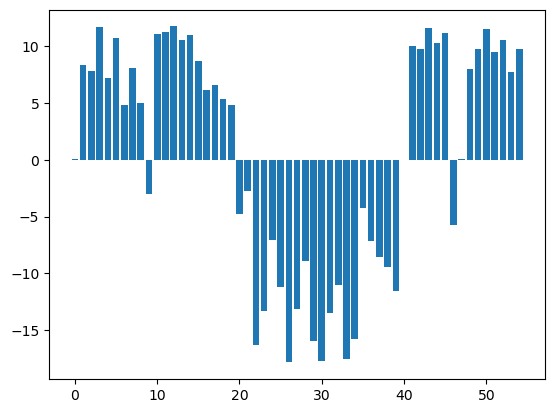

In [33]:
plt.bar(np.arange(rdc.size), rdc)

In [22]:
np.min(dd_obs[3] -  rdc)

-4.431197901483257

<BarContainer object of 41 artists>

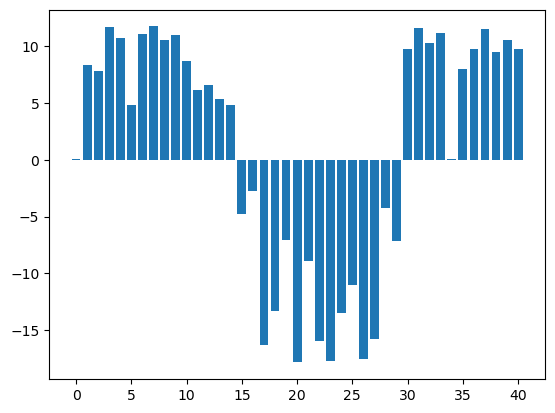

In [39]:
plt.bar(np.arange(rdc[inds].size), rdc[inds])

<BarContainer object of 41 artists>

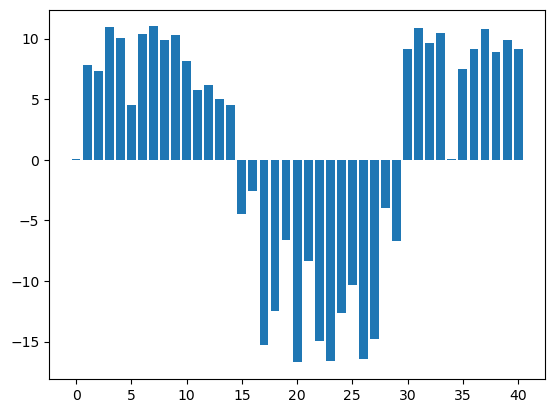

In [23]:
dd_obs = df[8].to_numpy()
plt.bar(np.arange(dd_obs.size), dd_obs)

In [34]:
# df = pd.read_csv("ssiaB.tbl", sep=" ", skipinitialspace=True, skiprows=65, header=None)
df = pd.read_csv("ssiaB.tbl", sep=" ", skipinitialspace=True, skiprows=65, header=None)


In [35]:
df[0] += 5 - 7
df[3] += 5 - 7
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,THR,HN,0,THR,N,-21523.11,1.464,0.0857,1.3783,1.0,1.0
1,1,TYR,HN,1,TYR,N,-21523.11,7.057,7.8340,-0.7770,1.0,1.0
2,2,LYS,HN,2,LYS,N,-21523.11,8.654,7.3118,1.3422,1.0,1.0
3,3,LEU,HN,3,LEU,N,-21523.11,12.180,10.9437,1.2363,1.0,1.0
4,5,LEU,HN,5,LEU,N,-21523.11,12.691,10.0725,2.6185,1.0,1.0
5,6,ASN,HN,6,ASN,N,-21523.11,5.202,4.5600,0.6420,1.0,1.0
6,10,LEU,HN,10,LEU,N,-21523.11,11.677,10.3776,1.2994,1.0,1.0
7,12,GLY,HN,12,GLY,N,-21523.11,10.553,11.0063,-0.4533,1.0,1.0
8,13,GLU,HN,13,GLU,N,-21523.11,11.154,9.9303,1.2237,1.0,1.0
9,14,THR,HN,14,THR,N,-21523.11,11.009,10.3052,0.7038,1.0,1.0


In [36]:
inds = df[0].to_numpy()

In [37]:
inds

array([ 0,  1,  2,  3,  5,  6, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 42, 43, 44, 45,
       47, 48, 49, 50, 51, 52, 54])

<BarContainer object of 41 artists>

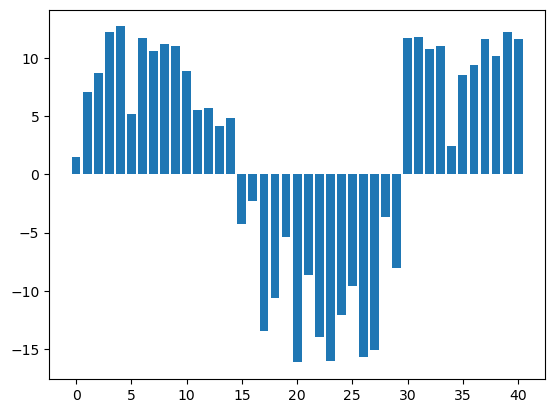

In [49]:
dd_obs = df[7].to_numpy()
plt.bar(np.arange(dd_obs.size), dd_obs)

In [53]:
traj[0].n_residues

55

In [88]:
rdc

array([ 14.45254656,  13.35016881,  12.93782116,   6.87217915,
         8.8721823 ,   0.59504675,   7.45901589,   1.21415512,
        -9.26464252,   9.48207573,  13.49192538,  13.57770364,
        11.48904256,  12.90198498,  15.37489059,  13.81444834,
        14.19623353,  11.05307288,  10.23520504,   0.92808015,
         1.15884737, -18.21370313, -10.85215125,  -2.47678561,
       -11.14087035, -20.01788728, -10.59166318,  -6.65774703,
       -19.05439126, -18.74596105, -11.33900797, -11.09907604,
       -20.25551192, -14.927624  ,  -0.05619694, -13.46874383,
       -11.96264109, -16.16080284, -16.28973639,  -5.70551224,
         7.23310399,   9.78922941,  14.54720129,  13.35515042,
        11.87527991,  -8.16796483,  -0.56428454,  10.20681118,
        15.29034921,  14.08243006,   7.36645053,   8.63808149,
         4.64592591,   6.82055549])

In [76]:
dd_obs

array([  1.464,   7.057,   8.654,  12.18 ,  12.691,   5.202,  11.677,
        10.553,  11.154,  11.009,   8.874,   5.519,   5.651,   4.173,
         4.799,  -4.294,  -2.326, -13.433, -10.596,  -5.413, -16.158,
        -8.662, -13.968, -16.039, -12.049,  -9.608, -15.696, -15.091,
        -3.687,  -8.065,  11.676,  11.812,  10.76 ,  11.043,   2.457,
         8.514,   9.368,  11.593,  10.149,  12.224,  11.622])

In [62]:
inds = df[0].to_numpy()[:-1] - 1

In [47]:
!cat ssiaB.tbl

REMARK Molecular Alignment Simulation.

REMARK Simulation parameters.

DATA PALES_MODE STERIC

DATA PALES LC_TYPE             wall
DATA PALES LC_CONCENTRATION    0.050
DATA PALES ORIENT_SPHERE       100
DATA PALES ORIENT_PSI          18
DATA PALES GRID_SPACING        0.200
DATA PALES MODEL_RADIUS        20.000
DATA PALES LC_ORDER            0.800
DATA PALES ATOM_RADIUS         0.000
DATA PALES SEL_SIMPLE_FLAG     0
DATA PALES SURF_FLAG           1


REMARK Order matrix.

DATA SAUPE  -8.9631e-05  2.4300e-04  3.8479e-04 -4.4164e-04  3.9631e-04

DATA IRREDUCIBLE REPRESENTATION (A0,A1R,A1I,A2R,A2I)   -3.0583e+00  1.2304e+01  1.1041e+01  3.3849e+00 -1.0720e+01
DATA IRREDUCIBLE GENERAL_MAGNITUDE   2.8438e+01


REMARK Eigensystem & Euler angles for clockwise rotation about z, y', z''.

DATA EIGENVALUES (Axx,Ayy,Azz)    3.0889e-04  5.1593e-04 -8.2482e-04
DATA EIGENVECTORS
DATA EIGENVECTORS XAXIS  1.2036e-01  7.6741e-01  6.2976e-01
DATA EIGENVECTORS YAXIS  8.5264e-01  2.4500e-01 -4.6150e-01
DAT